In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sourcing and Reading the data

In [2]:
#setting the path to read the json file from
path ="C:\\Users\\lenovo\\Downloads\\meta_Cell_Phones_and_Accessories.json" 
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [3]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [4]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [5]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('C:\\Users\\lenovo\\Downloads\\Cell_Phones_and_Accessories_5.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_phonedata.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [9]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [7]:
df_meta.shape

(590071, 18)

In [8]:

#extracting only those entries which have cell phones in the second element of the category list
df_meta = df_meta[df_meta['category'].str[1] == "Cell Phones"]

## Data preprocessing

In [9]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [10]:
df_meta.shape

(9823, 18)

In [11]:
df_phonedata.shape

(1128437, 13)

In [12]:
#checking the null values in the datasets

round(df_phonedata.isnull().sum()/len(df_phonedata)*100,2)

overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style               46.36
reviewerName         0.01
reviewText           0.07
summary              0.05
unixReviewTime       0.00
vote                91.84
image               97.60
review_sentiment     0.00
Date&Time            0.00
dtype: float64

In [13]:
round(df_meta.isnull().sum()/len(df_phonedata)*100,2)

category        0.0
tech1           0.0
description     0.0
fit             0.0
title           0.0
also_buy        0.0
image           0.0
tech2           0.0
brand           0.0
feature         0.0
rank            0.0
also_view       0.0
details         0.0
main_cat        0.0
similar_item    0.0
date            0.0
price           0.0
asin            0.0
dtype: float64

In [14]:
#dropping the columns with more than 40% null values in the phone dataset
df_phonedata = df_phonedata.drop(['style','vote','image'],axis=1)

In [15]:
df_phonedata.isnull().sum()

overall               0
verified              0
reviewerID            0
asin                  0
reviewerName        156
reviewText          768
summary             525
unixReviewTime        0
review_sentiment      0
Date&Time             0
dtype: int64

In [16]:
#there are some negligible amount of null values present, so lets drop the entries where these null values are present
df_phonedata.dropna(axis=0,inplace=True)

In [17]:
#no more null values
df_phonedata.isnull().sum()

overall             0
verified            0
reviewerID          0
asin                0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
review_sentiment    0
Date&Time           0
dtype: int64

In [18]:
df_phonedata.shape

(1127041, 10)

In [19]:
#lets merge the datasets together based on the "asin" column

df_merged = pd.merge(df_phonedata,df_meta,on="asin")
print(df_merged.shape)
df_merged.head(10)

(63861, 27)


,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review_sentiment,Date&Time,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,NEGATIVE,2004-09-21,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
1,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,NEGATIVE,2004-09-21,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
2,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,POSITIVE,2004-07-24,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
3,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,POSITIVE,2004-07-24,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
4,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,NEGATIVE,2004-07-06,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
5,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,NEGATIVE,2004-07-06,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
6,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,POSITIVE,2004-04-12,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
7,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,POSITIVE,2004-04-12,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
8,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,POSITIVE,2004-02-19,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,
9,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,POSITIVE,2004-02-19,...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,


- we have a merged dataset with 63861 entries and 27 columns which we will have to further process and clean since there are a lot of values like blank spaces, [] etc. 

In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63861 entries, 0 to 63860
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           63861 non-null  float64
 1   verified          63861 non-null  bool   
 2   reviewerID        63861 non-null  object 
 3   asin              63861 non-null  object 
 4   reviewerName      63861 non-null  object 
 5   reviewText        63861 non-null  object 
 6   summary           63861 non-null  object 
 7   unixReviewTime    63861 non-null  int64  
 8   review_sentiment  63861 non-null  object 
 9   Date&Time         63861 non-null  object 
 10  category          63861 non-null  object 
 11  tech1             63861 non-null  object 
 12  description       63861 non-null  object 
 13  fit               63861 non-null  object 
 14  title             63861 non-null  object 
 15  also_buy          63861 non-null  object 
 16  image             63861 non-null  object

In [21]:
#lets convert columns to correct datatype
df_merged['Date&Time']= pd.to_datetime(df_merged['Date&Time'])
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [22]:
#creating new columns for year,month and day
df_merged['year'] = pd.DatetimeIndex(df_merged['Date&Time']).year
df_merged['month'] = pd.DatetimeIndex(df_merged['Date&Time']).month
df_merged['day'] = pd.DatetimeIndex(df_merged['Date&Time']).day

In [23]:
round(df_merged.isnull().sum()/len(df_merged)*100,2)

overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
reviewerName         0.00
reviewText           0.00
summary              0.00
unixReviewTime       0.00
review_sentiment     0.00
Date&Time            0.00
category             0.00
tech1                0.00
description          0.00
fit                  0.00
title                0.00
also_buy             0.00
image                0.00
tech2                0.00
brand                0.00
feature              0.00
rank                 0.00
also_view            0.00
details              0.00
main_cat             0.00
similar_item         0.00
date                98.77
price                0.00
year                 0.00
month                0.00
day                  0.00
dtype: float64

In [24]:
#replacing blank spaces with null values
df_merged.replace("", float('NaN'), inplace=True)

In [25]:
#checking the null value percentage in the dataset
round(df_merged.isnull().sum()/len(df_merged)*100,2)

overall               0.00
verified              0.00
reviewerID            0.00
asin                  0.00
reviewerName          0.00
reviewText            0.00
summary               0.00
unixReviewTime        0.00
review_sentiment      0.00
Date&Time             0.00
category              0.00
tech1                99.97
description           0.00
fit                 100.00
title                 0.00
also_buy              0.00
image                 0.00
tech2                99.98
brand                 0.12
feature               0.00
rank                  0.00
also_view             0.00
details               0.00
main_cat              0.00
similar_item         25.88
date                 98.77
price                54.47
year                  0.00
month                 0.00
day                   0.00
dtype: float64

In [26]:
#dropping the columns which don't seem to be useful and the ones with very high null values
df_merged = df_merged.drop(['tech1','fit','tech2','date','price','similar_item'],axis=1)

In [27]:
#checking the null value percentage in the dataset after dropping the necessary columns
round(df_merged.isnull().sum()/len(df_merged)*100,2)

overall             0.00
verified            0.00
reviewerID          0.00
asin                0.00
reviewerName        0.00
reviewText          0.00
summary             0.00
unixReviewTime      0.00
review_sentiment    0.00
Date&Time           0.00
category            0.00
description         0.00
title               0.00
also_buy            0.00
image               0.00
brand               0.12
feature             0.00
rank                0.00
also_view           0.00
details             0.00
main_cat            0.00
year                0.00
month               0.00
day                 0.00
dtype: float64

In [28]:
#we still see around 0.12% of null  values in the brand column. Since we cannot impute it with another value, lets drop the entries 
df_merged.dropna(axis=0,inplace=True)

In [29]:
round(df_merged.isnull().sum()/len(df_merged)*100,2)

overall             0.0
verified            0.0
reviewerID          0.0
asin                0.0
reviewerName        0.0
reviewText          0.0
summary             0.0
unixReviewTime      0.0
review_sentiment    0.0
Date&Time           0.0
category            0.0
description         0.0
title               0.0
also_buy            0.0
image               0.0
brand               0.0
feature             0.0
rank                0.0
also_view           0.0
details             0.0
main_cat            0.0
year                0.0
month               0.0
day                 0.0
dtype: float64

In [30]:
df_merged.main_cat.value_counts()

Cell Phones & Accessories    63327
All Electronics                366
Apple Products                  46
Amazon Home                     29
Computers                       17
Name: main_cat, dtype: int64

In [31]:
#we see that around 17 entries are computers, this would impact our analysis, hence lets remove these entries
df_merged = df_merged[df_merged.main_cat!='Computers']

In [32]:
df_merged.main_cat.value_counts()

Cell Phones & Accessories    63327
All Electronics                366
Apple Products                  46
Amazon Home                     29
Name: main_cat, dtype: int64

In [33]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review_sentiment,Date&Time,...,image,brand,feature,rank,also_view,details,main_cat,year,month,day
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,NEGATIVE,2004-09-21,...,[https://images-na.ssl-images-amazon.com/image...,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,2004,9,21
1,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,NEGATIVE,2004-09-21,...,[https://images-na.ssl-images-amazon.com/image...,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,2004,9,21
2,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,POSITIVE,2004-07-24,...,[https://images-na.ssl-images-amazon.com/image...,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,2004,7,24
3,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,POSITIVE,2004-07-24,...,[https://images-na.ssl-images-amazon.com/image...,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,2004,7,24
4,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,NEGATIVE,2004-07-06,...,[https://images-na.ssl-images-amazon.com/image...,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,2004,7,6


In [34]:
df_merged.shape

(63768, 24)

In [35]:
df_merged[df_merged['main_cat']=='[]'].shape

(0, 24)

In [36]:
df_merged[df_merged['title']=='[]'].shape


(0, 24)

In [37]:
df_merged[df_merged['also_buy']=='[]'].shape

(0, 24)

- The data that we have now is pretty clean and in the correct data types format 
- But however we will not be using all the columns for the business solution analysis


- The critical columns and most necessary ones are stored in a separate dataframe called df_new


In [38]:
#creating a new data frame with the necessary columns for further analysis
df_new = df_merged[['overall','verified','reviewerID','asin','reviewerName','reviewText',
                    'summary','review_sentiment','main_cat','brand','details','year','month','day','description','title']]



## Analysing variables and finding the best performing products and brands in the market

- Here we make an assumption that the number of reviews corresponds to the volume of sales

In [39]:
#creating a table with the count of overall rating brandwise with the minimum and maximum stars provided as well
brand_table = df_new.groupby(by='brand').overall.agg(['count','min','max']).sort_values('count', ascending=False)
brand_table = brand_table.reset_index()
brand_table


,brand,count,min,max
0,Samsung,16197,1.0,5.0
1,BLU,9318,1.0,5.0
2,LG,6652,1.0,5.0
3,Motorola,4945,1.0,5.0
4,Nokia,4885,1.0,5.0
...,...,...,...,...
141,Diswoe,5,5.0,5.0
142,"Quality Technology Industrial Co., ltd.",5,1.0,4.0
143,TracFone,5,1.0,5.0
144,Republic Wireless,5,2.0,5.0


In [40]:
#extracting the top 15 brands
top_brands = brand_table['brand'].head(15)
count = brand_table['count'].head(15)

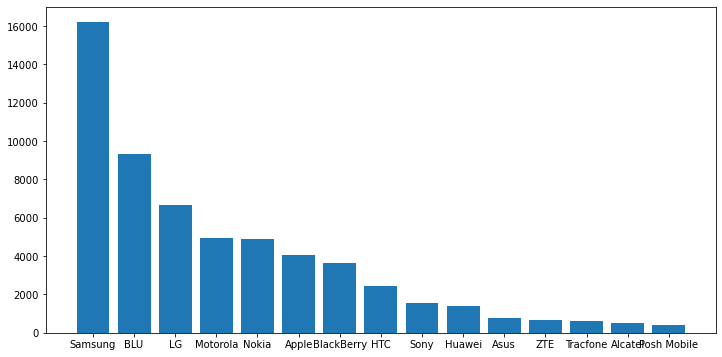

In [44]:
#plotting the top 15 brands
plt.figure(figsize=(12,6))
plt.bar(top_brands,count)
plt.show()

- Here we clearly see that "Samsung" is the most popular brand among all. Second comes BLU, then LG and so on..

In [213]:
#creating a table with the count of overall rating product-wise with the minimum and maximum stars provided as well
product_table = df_new.groupby(by='title').overall.agg(['count','min','max']).sort_values('count', ascending=False)
product_table = product_table.reset_index()
product_table.head(10)

,title,count,min,max
0,"Samsung Galaxy S5, White 16GB (AT&amp;T)",805,1.0,5.0
1,"BLU Advance 4.0 Unlocked Cellphone, Black",778,1.0,5.0
2,Samsung Galaxy S3 Mini GT-i8190 GSM Unlocked I...,691,1.0,5.0
3,Nokia Lumia 520 (AT&amp;T Go Phone) No Annual ...,658,1.0,5.0
4,Motorola Moto G (2nd generation) Unlocked Cell...,530,1.0,5.0
5,Samsung Galaxy S4 Mini Duos GT-i9192 Factory U...,453,1.0,5.0
6,Nokia Lumia 521 T-Mobile Windows 8 4G Smartpho...,440,1.0,5.0
7,Nokia Lumia 635 AT&amp;T (Black),395,1.0,5.0
8,Huawei Nexus 6p 128GB - Factory Unlocked Phone...,371,1.0,5.0
9,"ASUS ZenFone 2 Unlocked Cellphone , 64GB, Silv...",367,1.0,5.0


- We see in the list of top highly rated products, we find Samsung Galaxy S5 to the be the best and then comes BLU Advance. Products following belong to Nokia, Motorola etc.

In [46]:
df_new.to_csv('C://Users//Lenovo//Downloads/df_new.csv')

In [2]:
df_new = pd.read_csv('C://Users//Lenovo//Downloads/df_new.csv')

## Text analytics

In [47]:
#extracting the review text data from the data frame to perform Text Analytics 
df_new.reviewText

0        This phone is ugly and heavy and has a terribl...
1        This phone is ugly and heavy and has a terribl...
2        I had the Samsung V205 and then I decided to t...
3        I had the Samsung V205 and then I decided to t...
4        This is the first Samsung phone I have had and...
                               ...                        
63856    The phone was stolen could not activate at all...
63857                                                 good
63858    I purchased two of them and had so many proble...
63859                                            excelente
63860    This is a great Smartphone for someone who's n...
Name: reviewText, Length: 63768, dtype: object

In [48]:
#converting the text data into string 
doc = df_new.reviewText.to_string()

In [49]:
#importing regex to remove punctuations from the string
import re

In [50]:
#removing punctuations from the string
doc = re.sub(pattern = "[^\w\s]",repl="",string=doc)

In [51]:
#tokenizing the string document
from nltk.tokenize import word_tokenize

In [52]:
tokens = word_tokenize(doc)
print(tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [53]:
#downloading wordnet library
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
#lemmatizing the words in the document 
WordNetLemmatizer = WordNetLemmatizer()
lemmatized_doc = [WordNetLemmatizer.lemmatize(token) for token in tokens]
print(lemmatized_doc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [66]:
#removing stop words which are present in the stopwords.txt file provided in the google drive 

stop_words = [line.rstrip('\n') for line in open('C://Users//Lenovo//Downloads/stop_words_long.txt')]
lemmatized_doc_no_stops = [i for i in lemmatized_doc if i not in stop_words]
lemmatized_doc_no_stops = [i.lower() for i in lemmatized_doc_no_stops]

In [67]:
#creating a bag of words model out of words we have in the document
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(lemmatized_doc_no_stops)

In [68]:
print(bow_model)

  (1, 75582)	1
  (2, 72294)	1
  (3, 76001)	1
  (4, 69236)	1
  (5, 69078)	1
  (6, 75480)	1
  (8, 75582)	1
  (9, 72294)	1
  (10, 76001)	1
  (11, 69236)	1
  (12, 69078)	1
  (13, 75480)	1
  (16, 74035)	1
  (17, 76314)	1
  (19, 66772)	1
  (22, 74035)	1
  (23, 76314)	1
  (25, 66772)	1
  (27, 75582)	1
  (28, 74035)	1
  (29, 72294)	1
  (32, 75582)	1
  (33, 74035)	1
  (34, 72294)	1
  (37, 69611)	1
  :	:
  (325156, 60089)	1
  (325157, 76697)	1
  (325159, 70463)	1
  (325160, 74726)	1
  (325161, 65586)	1
  (325162, 76120)	1
  (325163, 70883)	1
  (325164, 60090)	1
  (325165, 75529)	1
  (325166, 72294)	1
  (325167, 76526)	1
  (325168, 75013)	1
  (325169, 71580)	1
  (325170, 64305)	1
  (325171, 60091)	1
  (325172, 68795)	1
  (325173, 60092)	1
  (325175, 73192)	1
  (325176, 72913)	1
  (325177, 60093)	1
  (325178, 67780)	1
  (325179, 60095)	1
  (325180, 75582)	1
  (325181, 68953)	1
  (325182, 74643)	1


In [69]:
#finding out the frequency of the top 15 used words in the corpus
from nltk import FreqDist
word_frequency = FreqDist(lemmatized_doc_no_stops)
frequency = word_frequency.most_common(1)[0]
print(frequency)

('phone', 22458)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

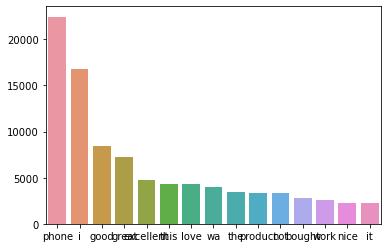

In [70]:
labels = [element[0] for element in word_frequency.most_common(15)]
counts = [element[1] for element in word_frequency.most_common(15)]
sns.barplot(labels,counts)

- Here we see that the word phone is the most used and the words like good and great also occur in a big number

In [71]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (2.8.1)



In [72]:
#Plotting a word cloud for the words in the entire text corpus 
from PIL import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt


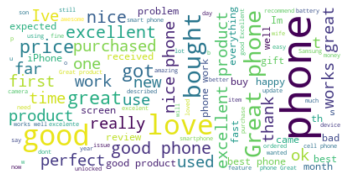

In [73]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(doc)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Now lets split the data frame according to the positive and negative review sentiment and analyse them individually 
    

In [74]:
df_positive = df_new[df_new.review_sentiment=='POSITIVE']
df_negative = df_new[df_new.review_sentiment=='NEGATIVE']

##### Analysing the df_positive dataframe and seeing which features are most mentioned

In [86]:
pos_doc = df_positive.reviewText.to_string()

In [87]:
pos_doc = re.sub(pattern = "[^\w\s]",repl="",string=pos_doc)


In [88]:
tokens0 = word_tokenize(pos_doc)

In [89]:
tokens0

['2',
 'I',
 'had',
 'the',
 'Samsung',
 'V205',
 'and',
 'then',
 'I',
 'decided',
 'to',
 't',
 '3',
 'I',
 'had',
 'the',
 'Samsung',
 'V205',
 'and',
 'then',
 'I',
 'decided',
 'to',
 't',
 '6',
 'and',
 'Im',
 'from',
 'Europe',
 'where',
 'the',
 'phones',
 'and',
 'ne',
 '7',
 'and',
 'Im',
 'from',
 'Europe',
 'where',
 'the',
 'phones',
 'and',
 'ne',
 '8',
 'This',
 'phone',
 'is',
 'amazingly',
 'small',
 'and',
 'light',
 'for',
 'a',
 '9',
 'This',
 'phone',
 'is',
 'amazingly',
 'small',
 'and',
 'light',
 'for',
 'a',
 '10',
 'The',
 'last',
 'year',
 'or',
 'so',
 'we',
 'have',
 'all',
 'seen',
 'an',
 'explos',
 '11',
 'The',
 'last',
 'year',
 'or',
 'so',
 'we',
 'have',
 'all',
 'seen',
 'an',
 'explos',
 '32',
 'I',
 'had',
 'been',
 'very',
 'happy',
 'with',
 'my',
 'Motorola',
 'phone',
 'u',
 '33',
 'I',
 'had',
 'been',
 'very',
 'happy',
 'with',
 'my',
 'Motorola',
 'phone',
 'u',
 '34',
 'I',
 'dont',
 'own',
 'this',
 'phone',
 'I',
 'own',
 'the',
 'che

In [90]:
pos_lemmatized_doc = [WordNetLemmatizer.lemmatize(word) for word in tokens0]

In [91]:
pos_lemmatized_doc_no_stops = [i for i in pos_lemmatized_doc if i not in stop_words]

In [106]:
pos_words = [line.rstrip('\n') for line in open('C://Users//Lenovo//Downloads/pos_words.txt')]
pos_lemmatized_doc_no_stops = [i.lower() for i in pos_lemmatized_doc_no_stops]
pos_lemmatized_doc_no_stops = [i for i in pos_lemmatized_doc_no_stops if i not in pos_words]



In [190]:
x = word_tokenize(pos_doc)

In [191]:
x = [i.lower() for i in x if i not in pos_words and i not in stop_words and i not in ['good','great','phone']]
x

['2',
 'i',
 'samsung',
 'v205',
 'i',
 'decided',
 '3',
 'i',
 'samsung',
 'v205',
 'i',
 'decided',
 '6',
 'im',
 'europe',
 'phones',
 'ne',
 '7',
 'im',
 'europe',
 'phones',
 'ne',
 '8',
 'this',
 'light',
 '9',
 'this',
 'light',
 '10',
 'the',
 'seen',
 'explos',
 '11',
 'the',
 'seen',
 'explos',
 '32',
 'i',
 'motorola',
 '33',
 'i',
 'motorola',
 '34',
 'i',
 'dont',
 'own',
 'i',
 'own',
 'moto',
 '35',
 'i',
 'dont',
 'own',
 'i',
 'own',
 'moto',
 '36',
 'great',
 'motorola',
 'leaps',
 'bounds',
 'ove',
 '37',
 'great',
 'motorola',
 'leaps',
 'bounds',
 'ove',
 '38',
 'i',
 '5',
 'cell',
 'phones',
 'past',
 '10',
 '39',
 'i',
 '5',
 'cell',
 'phones',
 'past',
 '10',
 '40',
 'ive',
 '3',
 'months',
 'nextel',
 '41',
 'ive',
 '3',
 'months',
 'nextel',
 '42',
 'other',
 'high',
 'initial',
 'cost',
 'i',
 'got',
 'bef',
 '43',
 'other',
 'high',
 'initial',
 'cost',
 'i',
 'got',
 'bef',
 '48',
 'my',
 'phone',
 'is',
 'a',
 'candy',
 'red',
 'gets',
 'lots',
 'of',
 'at

In [192]:
ex = ' '.join([str(item) for item in x])
print(ex)

2 i samsung v205 i decided 3 i samsung v205 i decided 6 im europe phones ne 7 im europe phones ne 8 this light 9 this light 10 the seen explos 11 the seen explos 32 i motorola 33 i motorola 34 i dont own i own moto 35 i dont own i own moto 36 great motorola leaps bounds ove 37 great motorola leaps bounds ove 38 i 5 cell phones past 10 39 i 5 cell phones past 10 40 ive 3 months nextel 41 ive 3 months nextel 42 other high initial cost i got bef 43 other high initial cost i got bef 48 my phone is a candy red gets lots of attention 49 my phone is a candy red gets lots of attention 50 when i initially reviewed i 51 when i initially reviewed i 52 i 53 i 54 the pcs cell i owned venera 55 the pcs cell i owned venera 56 very good business 57 very good business 58 sprint opinion wireless carrier 59 sprint opinion wireless carrier 60 i got v600 month ago i 61 i got v600 month ago i 62 the v600 motorola finally arrived it 63 the v600 motorola finally arrived it 64 i am currently replacement v600 6

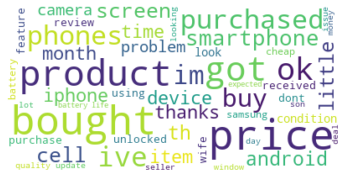

In [185]:
#creating a word cloud with words used in the positive reviews 
wordcloud1 = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(ex)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

- Here we see that words like Price, condition, smartphone are some important keywords used by the customer writing positive reviews 


In [97]:
neg_doc = df_negative.reviewText.to_string()
neg_doc = re.sub(pattern = "[^\w\s]",repl="",string=neg_doc)


In [98]:
tokens1 = word_tokenize(neg_doc)
neg_lemmatized_doc = [WordNetLemmatizer.lemmatize(token) for token in tokens1]

In [100]:
neg_lemmatized_doc_no_stops = [i for i in neg_lemmatized_doc if i not in stop_words]

In [110]:
neg_words = [line.rstrip('\n') for line in open('C://Users//Lenovo//Downloads/neg_words.txt')]
neg_lemmatized_doc_no_stops = [i.lower() for i in neg_lemmatized_doc_no_stops]
neg_lemmatized_doc_no_stops = [i for i in neg_lemmatized_doc_no_stops if i not in neg_words]

In [111]:
neg_bow_model = vectorizer.fit_transform(neg_lemmatized_doc_no_stops)
print(neg_bow_model)

  (1, 21082)	1
  (2, 18509)	1
  (3, 18447)	1
  (4, 21031)	1
  (6, 21082)	1
  (7, 18509)	1
  (8, 18447)	1
  (9, 21031)	1
  (11, 21082)	1
  (12, 20422)	1
  (15, 21082)	1
  (16, 20422)	1
  (18, 10001)	1
  (19, 18673)	1
  (20, 17141)	1
  (21, 18376)	1
  (22, 19396)	1
  (23, 21659)	1
  (25, 21509)	1
  (26, 10285)	1
  (27, 18673)	1
  (28, 17141)	1
  (29, 18376)	1
  (30, 19396)	1
  (31, 21659)	1
  :	:
  (57361, 20642)	1
  (57362, 20087)	1
  (57363, 16819)	1
  (57364, 15160)	1
  (57366, 16906)	1
  (57367, 16526)	1
  (57368, 19150)	1
  (57369, 20707)	1
  (57370, 17202)	1
  (57371, 15162)	1
  (57372, 18782)	1
  (57373, 20855)	1
  (57374, 20358)	1
  (57375, 19287)	1
  (57376, 15163)	1
  (57377, 18381)	1
  (57378, 15164)	1
  (57379, 20336)	1
  (57380, 18790)	1
  (57381, 15165)	1
  (57382, 15166)	1
  (57383, 21052)	1
  (57384, 21441)	1
  (57385, 16424)	1
  (57386, 15167)	1


In [193]:

s = word_tokenize(neg_doc)
s = [i.lower() for i in s if i not in neg_words and i not in stop_words and i not in ['excelente','excelent']]
s

['0',
 'this',
 'heavy',
 'terribl',
 '1',
 'this',
 'heavy',
 'terribl',
 '4',
 'this',
 'samsung',
 'i',
 '5',
 'this',
 'samsung',
 'i',
 '44',
 'in',
 'chicago',
 'gps',
 'never',
 'works',
 'yes',
 'i',
 'wen',
 '45',
 'in',
 'chicago',
 'gps',
 'never',
 'works',
 'yes',
 'i',
 'wen',
 '46',
 'this',
 'forum',
 'people',
 'express',
 'thei',
 '47',
 'this',
 'forum',
 'people',
 'express',
 'thei',
 '66',
 'we',
 'bought',
 'price',
 'la',
 '67',
 'we',
 'bought',
 'price',
 'la',
 '78',
 'i',
 'paid',
 'upgrade',
 'cameraphone',
 '79',
 'i',
 'paid',
 'upgrade',
 'cameraphone',
 '86',
 'i',
 'previously',
 'owned',
 'v400',
 'v525',
 'v600',
 '87',
 'i',
 'previously',
 'owned',
 'v400',
 'v525',
 'v600',
 '111',
 'i',
 'bought',
 'blackberry',
 'cingul',
 '123',
 'this',
 'clamshell',
 'i',
 'like',
 '124',
 'ive',
 'using',
 'wee',
 '128',
 'this',
 'nicest',
 'phones',
 'i',
 '129',
 'when',
 'i',
 'got',
 'treo',
 '650',
 'i',
 'excited',
 '140',
 'ive',
 'owned',
 'six',
 '

In [194]:
es = ' '.join([str(item) for item in s])
print(es)

0 this heavy terribl 1 this heavy terribl 4 this samsung i 5 this samsung i 44 in chicago gps never works yes i wen 45 in chicago gps never works yes i wen 46 this forum people express thei 47 this forum people express thei 66 we bought price la 67 we bought price la 78 i paid upgrade cameraphone 79 i paid upgrade cameraphone 86 i previously owned v400 v525 v600 87 i previously owned v400 v525 v600 111 i bought blackberry cingul 123 this clamshell i like 124 ive using wee 128 this nicest phones i 129 when i got treo 650 i excited 140 ive owned six treo palm phones i 144 a nice looking cheapie fairly eas 146 im selective cell 147 the front screen stopped 148 terrible sc 150 use att dropped service 151 worked well 155 comment 158 dont buy 159 phone worked for 2 weeksdissapointed 165 166 167 gracias 171 son usi 172 174 its stopped disappo 175 arrived deployed feasible 176 the mean 178 carrier 180 phone work it powers screen 190 el motorola razr v3 lo compr bajo la condicin 193 i razr v2 b

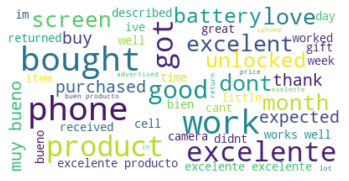

In [214]:
#creating a word cloud with words used in the positive reviews 
wordcloud2 = WordCloud(max_font_size=40, max_words=50, background_color="white").generate(es)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

- Here we see that features like screen, working of the phone, battery is seen to be some important keywords used by the users putting in negative reviews 


## Model Building 

In [121]:
df_new.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,review_sentiment,main_cat,brand,details,year,month,day,description,title
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,NEGATIVE,Cell Phones & Accessories,Samsung,{},2004,9,21,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...
1,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,NEGATIVE,Cell Phones & Accessories,Samsung,{},2004,9,21,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...
2,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,POSITIVE,Cell Phones & Accessories,Samsung,{},2004,7,24,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...
3,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,POSITIVE,Cell Phones & Accessories,Samsung,{},2004,7,24,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...
4,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,NEGATIVE,Cell Phones & Accessories,Samsung,{},2004,7,6,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...


In order for us to build a model, we need to extract only the Review Text column and the Review Sentiment column and then split it 

In [132]:
#creation of new dataframe
df_modelling = df_new[['reviewText','review_sentiment']]

In [133]:
df_modelling.head()

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,NEGATIVE
1,This phone is ugly and heavy and has a terribl...,NEGATIVE
2,I had the Samsung V205 and then I decided to t...,POSITIVE
3,I had the Samsung V205 and then I decided to t...,POSITIVE
4,This is the first Samsung phone I have had and...,NEGATIVE


In [134]:
#mapping the negatives to 0 and positive to 1
df_modelling['review_sentiment'] = df_modelling['review_sentiment'].map({'NEGATIVE':0,'POSITIVE':1})
df_modelling

<ipython-input-134-eb5ffa99feea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelling['review_sentiment'] = df_modelling['review_sentiment'].map({'NEGATIVE':0,'POSITIVE':1})


,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,0
1,This phone is ugly and heavy and has a terribl...,0
2,I had the Samsung V205 and then I decided to t...,1
3,I had the Samsung V205 and then I decided to t...,1
4,This is the first Samsung phone I have had and...,0
...,...,...
63856,The phone was stolen could not activate at all...,0
63857,good,1
63858,I purchased two of them and had so many proble...,1
63859,excelente,0


In [135]:
df_modelling_array = df_modelling.values

In [136]:
df_modelling_array

array([['This phone is ugly and heavy and has a terrible user interface even for techies like myself.  It also drops calls like crazy here in Manhattan.  The Moto V600 is a much better phone, takes better pictures, gives you better clarity and reception, is smaller, and is much, much cheaper.  Get the Moto V600 if you want T-Mobile.  Stay away from this ugly monster.',
        0],
       ['This phone is ugly and heavy and has a terrible user interface even for techies like myself.  It also drops calls like crazy here in Manhattan.  The Moto V600 is a much better phone, takes better pictures, gives you better clarity and reception, is smaller, and is much, much cheaper.  Get the Moto V600 if you want T-Mobile.  Stay away from this ugly monster.',
        0],
       ["I had the Samsung V205 and then I decided to try the E715 out. FYI to people with battery problems, with these kind of batteries, you must let it drain completely and then charge it.. kind of like building up your battery l

In [142]:
#converting into X and y

X = df_modelling.reviewText
y = df_modelling.review_sentiment

print(X.shape)
print(y.shape)

(63768,)
(63768,)


In [144]:
#splitting into test and train 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [145]:
X_train.head()

21758                                     Original Product
32738    It is grand and spectacular, and especially no...
43360    There's a million reviews of this phone out th...
1927                                           Great phone
26301    Our company has used Windows Mobile phones in ...
Name: reviewText, dtype: object

In [146]:
y_train.head()

21758    1
32738    1
43360    0
1927     1
26301    0
Name: review_sentiment, dtype: int64

In [147]:
#vectorizing the X_train and removing english stop words. 

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')

In [149]:
#We get the dictionary of the frequency of the words here
vect.fit(X_train)
vect.vocabulary_ 

{'original': 22808,
 'product': 25062,
 'grand': 15267,
 'spectacular': 29809,
 'especially': 12471,
 'consume': 8820,
 'battery': 5472,
 'austedes': 4550,
 'thanks': 31750,
 'grandiose': 15277,
 'person': 23788,
 'sales': 27767,
 'agents': 3303,
 'god': 15047,
 'bless': 6027,
 'million': 20661,
 'reviews': 27197,
 'phone': 23909,
 'matter': 20167,
 'exactly': 12692,
 'expected': 12919,
 'great': 15342,
 'company': 8345,
 'used': 33769,
 'windows': 35043,
 'mobile': 20921,
 'phones': 23937,
 'past': 23435,
 'current': 9576,
 'don': 11192,
 'hint': 16208,
 'merging': 20454,
 'game': 14626,
 'console': 8781,
 'needed': 21704,
 'pick': 24010,
 'ios': 17843,
 'android': 3777,
 'requirements': 26869,
 'different': 10625,
 'like': 19235,
 'functioning': 14461,
 'apps': 4111,
 'rdp': 25989,
 'sftp': 28497,
 'terminals': 31646,
 'file': 13565,
 'managers': 19960,
 'allow': 3519,
 'manage': 19953,
 'servers': 28436,
 'remotely': 26681,
 'large': 18833,
 'hd': 15915,
 'screen': 28099,
 'allows':

In [150]:
len(vect.vocabulary_.keys())

35868

In [151]:
#transforming the X_train and X_test values
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [152]:
print(type(X_train_transformed))
print(X_train_transformed)


<class 'scipy.sparse.csr.csr_matrix'>
  (0, 22808)	1
  (0, 25062)	1
  (1, 3303)	1
  (1, 4550)	1
  (1, 5472)	1
  (1, 6027)	1
  (1, 8820)	1
  (1, 12471)	1
  (1, 15047)	1
  (1, 15267)	1
  (1, 15277)	1
  (1, 23788)	1
  (1, 27767)	1
  (1, 29809)	1
  (1, 31750)	1
  (2, 12692)	1
  (2, 12919)	1
  (2, 20167)	1
  (2, 20661)	1
  (2, 23909)	1
  (2, 27197)	1
  (3, 15342)	1
  (3, 23909)	1
  (4, 695)	1
  (4, 2720)	2
  :	:
  (47823, 23909)	1
  (47823, 24910)	1
  (47823, 28582)	1
  (47823, 32064)	1
  (47823, 34025)	1
  (47823, 34168)	1
  (47823, 35205)	1
  (47823, 35272)	1
  (47824, 12747)	1
  (47825, 5425)	1
  (47825, 7540)	2
  (47825, 10592)	1
  (47825, 12912)	1
  (47825, 13081)	1
  (47825, 13335)	1
  (47825, 15175)	1
  (47825, 15342)	2
  (47825, 18009)	1
  (47825, 18348)	1
  (47825, 23909)	2
  (47825, 23937)	1
  (47825, 27195)	1
  (47825, 30202)	1
  (47825, 34712)	1
  (47825, 35272)	1


In [153]:
#importing the multinomial Naive Bayes and using it to fit on the model and predict y values for the X_transformed

from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB()

mnb.fit(X_train_transformed,y_train)

y_pred_class = mnb.predict(X_test_transformed)
y_pred_proba = mnb.predict_proba(X_test_transformed)

## Model evaluation

In [154]:
#here we will import the metrics module to evaluate the model and see how it performs in terms of different parameters like 
# accuracy , precision etc
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.8613724752226822

In [155]:
#finding the confusion matrix
metrics.confusion_matrix(y_test,y_pred_class)

array([[ 2451,  1591],
       [  619, 11281]], dtype=int64)

In [156]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[ 2451  1591]
 [  619 11281]]


In [167]:
#finding the sensitivity
sensitivity = TP/ float(FN+TP)
print('Sensitivity',sensitivity)

Sensitivity 0.947983193277311


In [166]:
#finding the specificity 
specificity = TN / float(TN + FP)
print('Specificity',specificity)

Specificity 0.6063829787234043


In [170]:
#precision of the model
print("Precision",metrics.precision_score(y_test,y_pred_class))

Precision 0.8763983840894966


In [161]:
#finding the recall
print('Recall',metrics.recall_score(y_test,y_pred_class))

Recall 0.947983193277311


In [162]:
#importing the required libraries to plot roc_curve and area under the curve to see how the model is performing
from sklearn.metrics import roc_curve , auc 
import matplotlib.pyplot as plt


In [163]:
false_positive_rate , true_positive_rate , thresholds = roc_curve (y_test , y_pred_proba[:,1])
roc_auc  = auc (false_positive_rate,true_positive_rate)

In [169]:
#Area under the curve
print('Area under the curve',roc_auc)

Area under the curve 0.8960470105904808


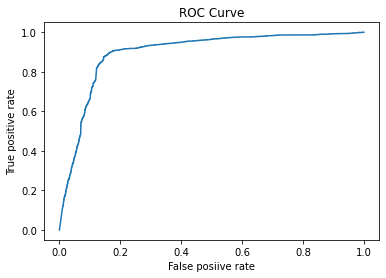

In [165]:
plt.ylabel('True positive rate')
plt.xlabel('False posiive rate')
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate)

#### Overall the project is doing good with 
- Sensitivity 0.947983193277311
- Precision 0.8763983840894966
- Recall 0.947983193277311
- Specificity 0.6063829787234043
- Area under the curve 0.8960470105904808

'C:\\Users\\lenovo'